# A brief look at recommender systems

Comparison of classification machine learning algorithms for a user's songs recommendation.

In today's information age the amount of content is tremendous, which creates the need for some kind of information filtering and ranging in browser searching results, on social media platforms and etc. Thus, it's important to be able to predict whether a user is going to positively respond to the shown recomenndation (like/repost/any other kind). Such companies as Spotify especially depend highly on the effectiveness of their recommendation systems for business success.

- **Collaborative filtering systems** became the first step in recommendation system development. The idea of collaborative filtering is that similar users like similar items, so it involves the use of users' actions to recommend other movies, songs and so on. CF systems can either be user-based (users' similarity) or item-based (items' similarity, more preferable). KNN here is a perfect go-to model and also a very good baseline, relying on item feature similarity by calculating the “distance” between objects.

- **Content-based filtering systems** started to take into consideration not just particular items, but rather their content. For example, if a user watches "Sherlock Holmes" but skips "Saw", the system predicts that this user enjoys detecive movies and doesn't like horrors.


- **Context-aware systems** finally appeared after the period of click-counting and semantic recommendations. Now the main role is given to context: a user's immediate reactions, interests, friend circle, etc. Such recommendation systems must output results as soon as the context data is received.
Classic deep neural network (Deep Crossing), Two-tower neural network, Shallow and deep model (combination of 2 or more deep learning networks), NLP-inspiral neural model (BERT4Rec), Deep Reinforcement learning (user's interactive behaviours are collected and used for training in real time), Graph neural network.

One of the current SOTA recommendation algorithms is  **DLRM**: Deep Learning Recommendation Model for Personalization and Recommendation Systems by Facebook.

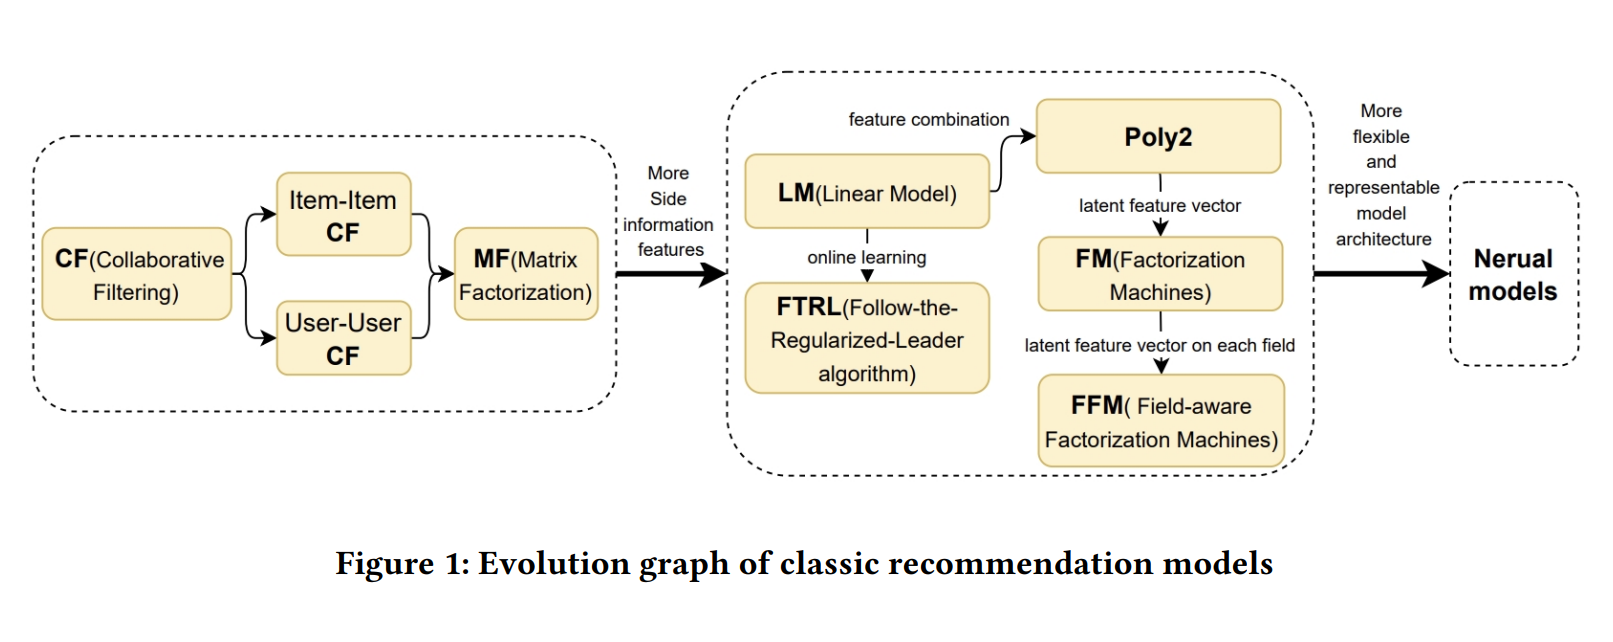

# Dataset

In [ ]:
import pandas as pd
import numpy as np

RANDOM_STATE = 22
np.random.seed(22)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!pip install spotipy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 8.3 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import util


client_id ='173d2e9a4b4040419aefdef82983cf7b'
secret = 'beca4da5a9844692ad21202b3148e5b8'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

spotify = spotipy.Spotify()

In [ ]:
# get names of my spotify playlists all playlist names

user_name = 'a0g5ovsvpk69xz8q2n2cwu9p9'
playlists = (sp.user_playlists(user_name))
for i, playlist in enumerate(playlists['items']):
  print(f'''playlist «{playlist["name"]}»:
  number of songs - {playlist["tracks"]["total"]}.
  playlist id - {playlist["id"]}''')
  print()

playlist «спать»:
  number of songs - 13.
  playlist id - 1tIpdeNqswkuzUV8igRG2Z

playlist «joy of feeling!!!!!!!!»:
  number of songs - 16.
  playlist id - 1GOS7Gcu3Omx5P0qgqTStN

playlist «любимке»:
  number of songs - 15.
  playlist id - 2mDpKpoqOwPRztmwfZUBhL

playlist «попыт»:
  number of songs - 127.
  playlist id - 5OzaITtM1r0PSJZ3noQf3y

playlist «сашульке»:
  number of songs - 77.
  playlist id - 4lkRmKTrSC2Llkw8ncFQh1

playlist «подарок»:
  number of songs - 59.
  playlist id - 5aM2MsF5HFgA8JYwQsCnb3

playlist «meine beste Freundin»:
  number of songs - 14.
  playlist id - 7FYkgGlLij4ctNTrHVByAN



Among my spotify playlists there are 2 that I've created to make my own dataset. In «да» there are my liked songs, in «нет», consequently, the songs i didn't and wouldn't like. Both of the playlists contain 158 songs.

In [ ]:
# get info about tracks from playlist based on the playlist ID
yes_track_results = sp.user_playlist(user_name, '1WQ8dJmgiyJkrkcKXHiy8t')
no_track_results = sp.user_playlist(user_name, '2HOz3JAvpAl4cuLV8xQHdM')

# creating a df with info about playlist tracks
yes_df_tracks = pd.DataFrame([[t['track']['id'], t['track']['name'], t['track']['artists'][0]['id'],
                               t['track']['artists'][0]['name'], t['track']['album']['name']]

                              for t in yes_track_results['tracks']['items']],

                             columns=['song_id', 'song_name', 'artist_id', 'artist_name', 'album_name'])


no_df_tracks = pd.DataFrame([[t['track']['id'], t['track']['name'], t['track']['artists'][0]['id'],
                               t['track']['artists'][0]['name'], t['track']['album']['name']]

                              for t in no_track_results['tracks']['items']],

                             columns=['song_id', 'song_name', 'artist_id', 'artist_name', 'album_name'])


In [ ]:
print(yes_df_tracks.shape)
yes_df_tracks.sample(3)

(100, 5)


song_id            song_name               artist_id  \
2   003vvx7Niy0yvhvHt4a68B       Mr. Brightside  0C0XlULifJtAgn6ZNCW2eu   
49  4TQJGu7KoqOFvjvopA8fx2  Quiet Little Voices  3gnrmLahFhVXRI9DA1MImH   
82  31yOJGtBuYfq4Q2c68BVjw              Ноктюрн  2nAUHbKI7TZShUwFpk6G08   

                  artist_name        album_name  
2                 The Killers          Hot Fuss  
49  We Were Promised Jetpacks  These Four Walls  
82                      Husky           Ноктюрн

In [ ]:
print(no_df_tracks.shape)
no_df_tracks.sample(3)

(100, 5)


song_id         song_name               artist_id  \
4   4YZ94smEP67GmCOVdENiP8  Looking For Love  5slpk6nu2IwwKx0EHe3GcL   
57  0tdRgufTWFxk2QgYyIifQH  Папина любовница  0yp6xP5xe1qarfugfTixOK   
96  2Btrkahc2sv03PVE9XBoGh           You & I  4AK6F7OLvEQ5QYCBNiQWHq   

      artist_name                        album_name  
4            Lena                     Top Hits 2023  
57     Monetochka  Декоративно-прикладное искусство  
96  One Direction     TikTok Viral Hits 2022 | 2023

In [ ]:
# put audio file features (danceability, valence etc) into df

def get_audio_features(spotify, ids):
    return pd.DataFrame(spotify.audio_features(ids))

In [ ]:
yes_music_features = get_audio_features(sp, yes_df_tracks['song_id'])
yes_music_features['liked'] = 1

no_music_features = get_audio_features(sp, yes_df_tracks['song_id'])
no_music_features['liked'] = 0

In [ ]:
raw_df = pd.concat([yes_music_features, no_music_features])
print(raw_df.shape)
raw_df.head()

(200, 19)


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.708   0.643    8    -8.920     0       0.0481       0.17100   
1         0.543   0.851    8    -4.782     1       0.2960       0.46100   
2         0.352   0.911    1    -5.230     1       0.0747       0.00121   
3         0.609   0.758    0    -4.885     0       0.0525       0.13900   
4         0.741   0.620   10    -5.505     1       0.0412       0.02950   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.0593    0.940  110.049  audio_features   
1          0.411000    0.1040    0.608  190.187  audio_features   
2          0.000000    0.0995    0.236  148.033  audio_features   
3          0.000005    0.1100    0.236  124.949  audio_features   
4          0.000809    0.0398    0.934  117.038  audio_features   

                       id                                   uri  \
0  46tUEN0dIhVxYbOgxCvkF4  spotify:track:46tUEN0dIhVxYbOgxCvkF4   
1  3q6iPQ339EnP4YAU4rDAnS  spotify:track:3q6iPQ339EnP4YAU4rDAnS   
2  003vvx7Niy0yvhvHt4a68B  spotify:track:003vvx7Niy0yvhvHt4a68B   
3  53IRnAWx13PYmoVYtemUBS  spotify:track:53IRnAWx13PYmoVYtemUBS   
4  3HMY0r2BAdpasXMY8rseR0  spotify:track:3HMY0r2BAdpasXMY8rseR0   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/46tUEN0dIhVx...   
1  https://api.spotify.com/v1/tracks/3q6iPQ339EnP...   
2  https://api.spotify.com/v1/tracks/003vvx7Niy0y...   
3  https://api.spotify.com/v1/tracks/53IRnAWx13PY...   
4  https://api.spotify.com/v1/tracks/3HMY0r2BAdpa...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/46tU...       188416   
1  https://api.spotify.com/v1/audio-analysis/3q6i...       130909   
2  https://api.spotify.com/v1/audio-analysis/003v...       222973   
3  https://api.spotify.com/v1/audio-analysis/53IR...       219711   
4  https://api.spotify.com/v1/audio-analysis/3HMY...       251424   

   time_signature  liked  
0               4      1  
1               4      1  
2               4      1  
3               4      1  
4               4      1

In [ ]:
from sklearn.utils import shuffle

raw_df[:] = raw_df.sample(frac=1).values
raw_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.278   0.907   10    -7.787     1       0.0529      0.005040   
1         0.323   0.648    8    -7.424     1       0.0374      0.005330   
2         0.336   0.837    7    -8.122     1       0.0456      0.000068   
3         0.510   0.667    9    -7.627     0       0.0459      0.111000   
4         0.482   0.866    7    -4.534     1       0.0293      0.000368   

   instrumentalness  liveness  valence    tempo            type  \
0          0.035200     0.292    0.648  161.185  audio_features   
1          0.000003     0.139    0.343   94.831  audio_features   
2          0.662000     0.137    0.438  154.102  audio_features   
3          0.018100     0.119    0.474  144.969  audio_features   
4          0.116000     0.247    0.372  147.994  audio_features   

                       id                                   uri  \
0  6A0dWRrk5WO5MtjnJ0rZZJ  spotify:track:6A0dWRrk5WO5MtjnJ0rZZJ   
1  5nyW1A1Q9PFunfmjqYhyRI  spotify:track:5nyW1A1Q9PFunfmjqYhyRI   
2  5pMFZGgg0n3jO5shA60gjO  spotify:track:5pMFZGgg0n3jO5shA60gjO   
3  30UzPDKM2HxNonUy74raA9  spotify:track:30UzPDKM2HxNonUy74raA9   
4  5gEni4dmBqme8fyPcyWYiK  spotify:track:5gEni4dmBqme8fyPcyWYiK   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6A0dWRrk5WO5...   
1  https://api.spotify.com/v1/tracks/5nyW1A1Q9PFu...   
2  https://api.spotify.com/v1/tracks/5pMFZGgg0n3j...   
3  https://api.spotify.com/v1/tracks/30UzPDKM2HxN...   
4  https://api.spotify.com/v1/tracks/5gEni4dmBqme...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6A0d...       224667   
1  https://api.spotify.com/v1/audio-analysis/5nyW...       267372   
2  https://api.spotify.com/v1/audio-analysis/5pMF...       356478   
3  https://api.spotify.com/v1/audio-analysis/30Uz...       231086   
4  https://api.spotify.com/v1/audio-analysis/5gEn...       187364   

   time_signature  liked  
0               4      0  
1               4      1  
2               4      0  
3               4      1  
4               4      1

Let's only leave columns that we'll use for training and prediction

In [ ]:
cols_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url']
raw_df = raw_df.drop(columns=cols_to_drop)
raw_df.head(3)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.278   0.907   10    -7.787     1       0.0529      0.005040   
1         0.323   0.648    8    -7.424     1       0.0374      0.005330   
2         0.336   0.837    7    -8.122     1       0.0456      0.000068   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.035200     0.292    0.648  161.185       224667               4   
1          0.000003     0.139    0.343   94.831       267372               4   
2          0.662000     0.137    0.438  154.102       356478               4   

   liked  
0      0  
1      1  
2      0

In [ ]:
raw_df.to_csv('spotify_data.csv', index=False)

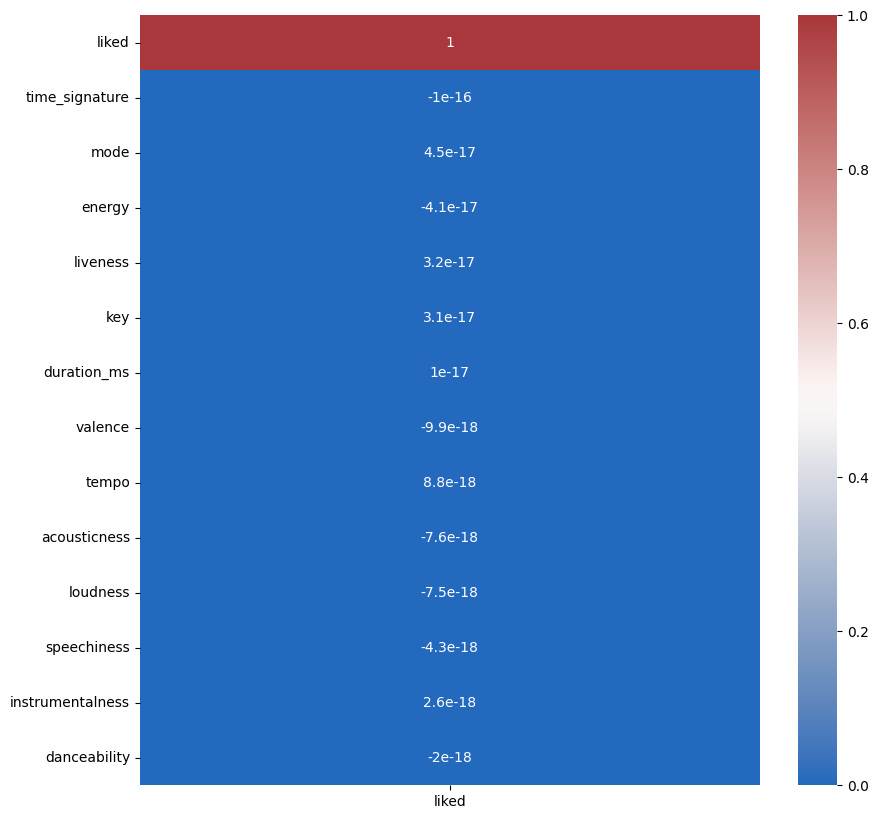

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

target_corr = raw_df.corr()[['liked']].sort_values(by='liked', key=abs, ascending=False)
sns.heatmap(target_corr, cmap='vlag', annot=True)

plt.show()

# Overview of the dataset and its features

**Dataset** - [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

A collection of 100 liked songs (French/American rap, rock, electro) and 95 disliked songs (various genres).

Variables (provided descriptions are taken from [Spotify's API documentation](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features)):



- **danceability** (степень танцевальности)

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **energy** (степень энергичности)

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **key** (тональность)

The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.


- **loudness** (громкость)

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **mode** (модальность)

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness** (объем слов)

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


- **acousticness** (акустичность)

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **instrumentalness** (инструментальность)

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.



- **liveness** (живое исполнение)

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **valence** (валентность)

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **tempo** (ритм)

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **duration_ms** (длительность)

Тhe duration of the track in milliseconds.

- **time_signature** (тактовый размер)

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

________________________________________

Target variable:

- **liked**

1 for liked songs , 0 for disliked songs


# EDA

In [ ]:
import pandas as pd
import numpy as np

RANDOM_STATE = 22
np.random.seed(22)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1

In [ ]:
df.shape

(195, 14)

The dataset consists of 195 objects and 14 columns (13 features + target column) represented by numeric values. It contains no empty values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [ ]:
df.describe()

danceability      energy         key    loudness        mode  \
count    195.000000  195.000000  195.000000  195.000000  195.000000   
mean       0.636656    0.638431    5.497436   -9.481631    0.538462   
std        0.216614    0.260096    3.415209    6.525086    0.499802   
min        0.130000    0.002400    0.000000  -42.261000    0.000000   
25%        0.462500    0.533500    2.000000   -9.962000    0.000000   
50%        0.705000    0.659000    6.000000   -7.766000    1.000000   
75%        0.799000    0.837500    8.000000   -5.829000    1.000000   
max        0.946000    0.996000   11.000000   -2.336000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   195.000000    195.000000        195.000000  195.000000  195.000000   
mean      0.148957      0.319093          0.192337    0.148455    0.493632   
std       0.120414      0.320782          0.346226    0.105975    0.267695   
min       0.027800      0.000003          0.000000    0.033100    0.035300   
25%       0.056800      0.042200          0.000000    0.084000    0.269000   
50%       0.096200      0.213000          0.000008    0.105000    0.525000   
75%       0.230500      0.504000          0.097500    0.177000    0.717500   
max       0.540000      0.995000          0.969000    0.633000    0.980000   

            tempo    duration_ms  time_signature       liked  
count  195.000000     195.000000      195.000000  195.000000  
mean   121.086174  213408.933333        3.912821    0.512821  
std     28.084829   72152.392864        0.451332    0.501122  
min     60.171000   77203.000000        1.000000    0.000000  
25%    100.242000  178300.500000        4.000000    0.000000  
50%    124.896000  204000.000000        4.000000    1.000000  
75%    142.460500  242373.500000        4.000000    1.000000  
max    180.036000  655213.000000        5.000000    1.000000

There seem to be no anomalies in the dataset at first blush

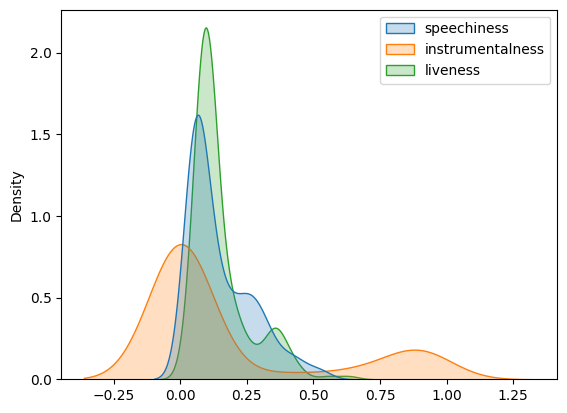

In [ ]:
sns.kdeplot(df[['speechiness', 'instrumentalness', 'liveness']], fill=True)
plt.show()

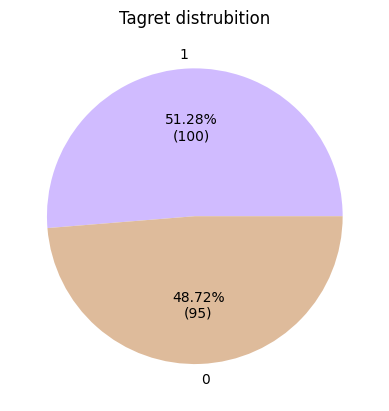

In [ ]:
target_counts = df['liked'].value_counts()
plt.pie(x=target_counts, labels=target_counts.index,
        autopct=lambda x: '{:.2f}%\n({:.0f})'.format(x, x * target_counts.sum() / 100), colors=sns.color_palette('pastel')[4:6])
plt.title('Tagret distrubition')
plt.show()

We can see that the target variable is almost evenly distributed.

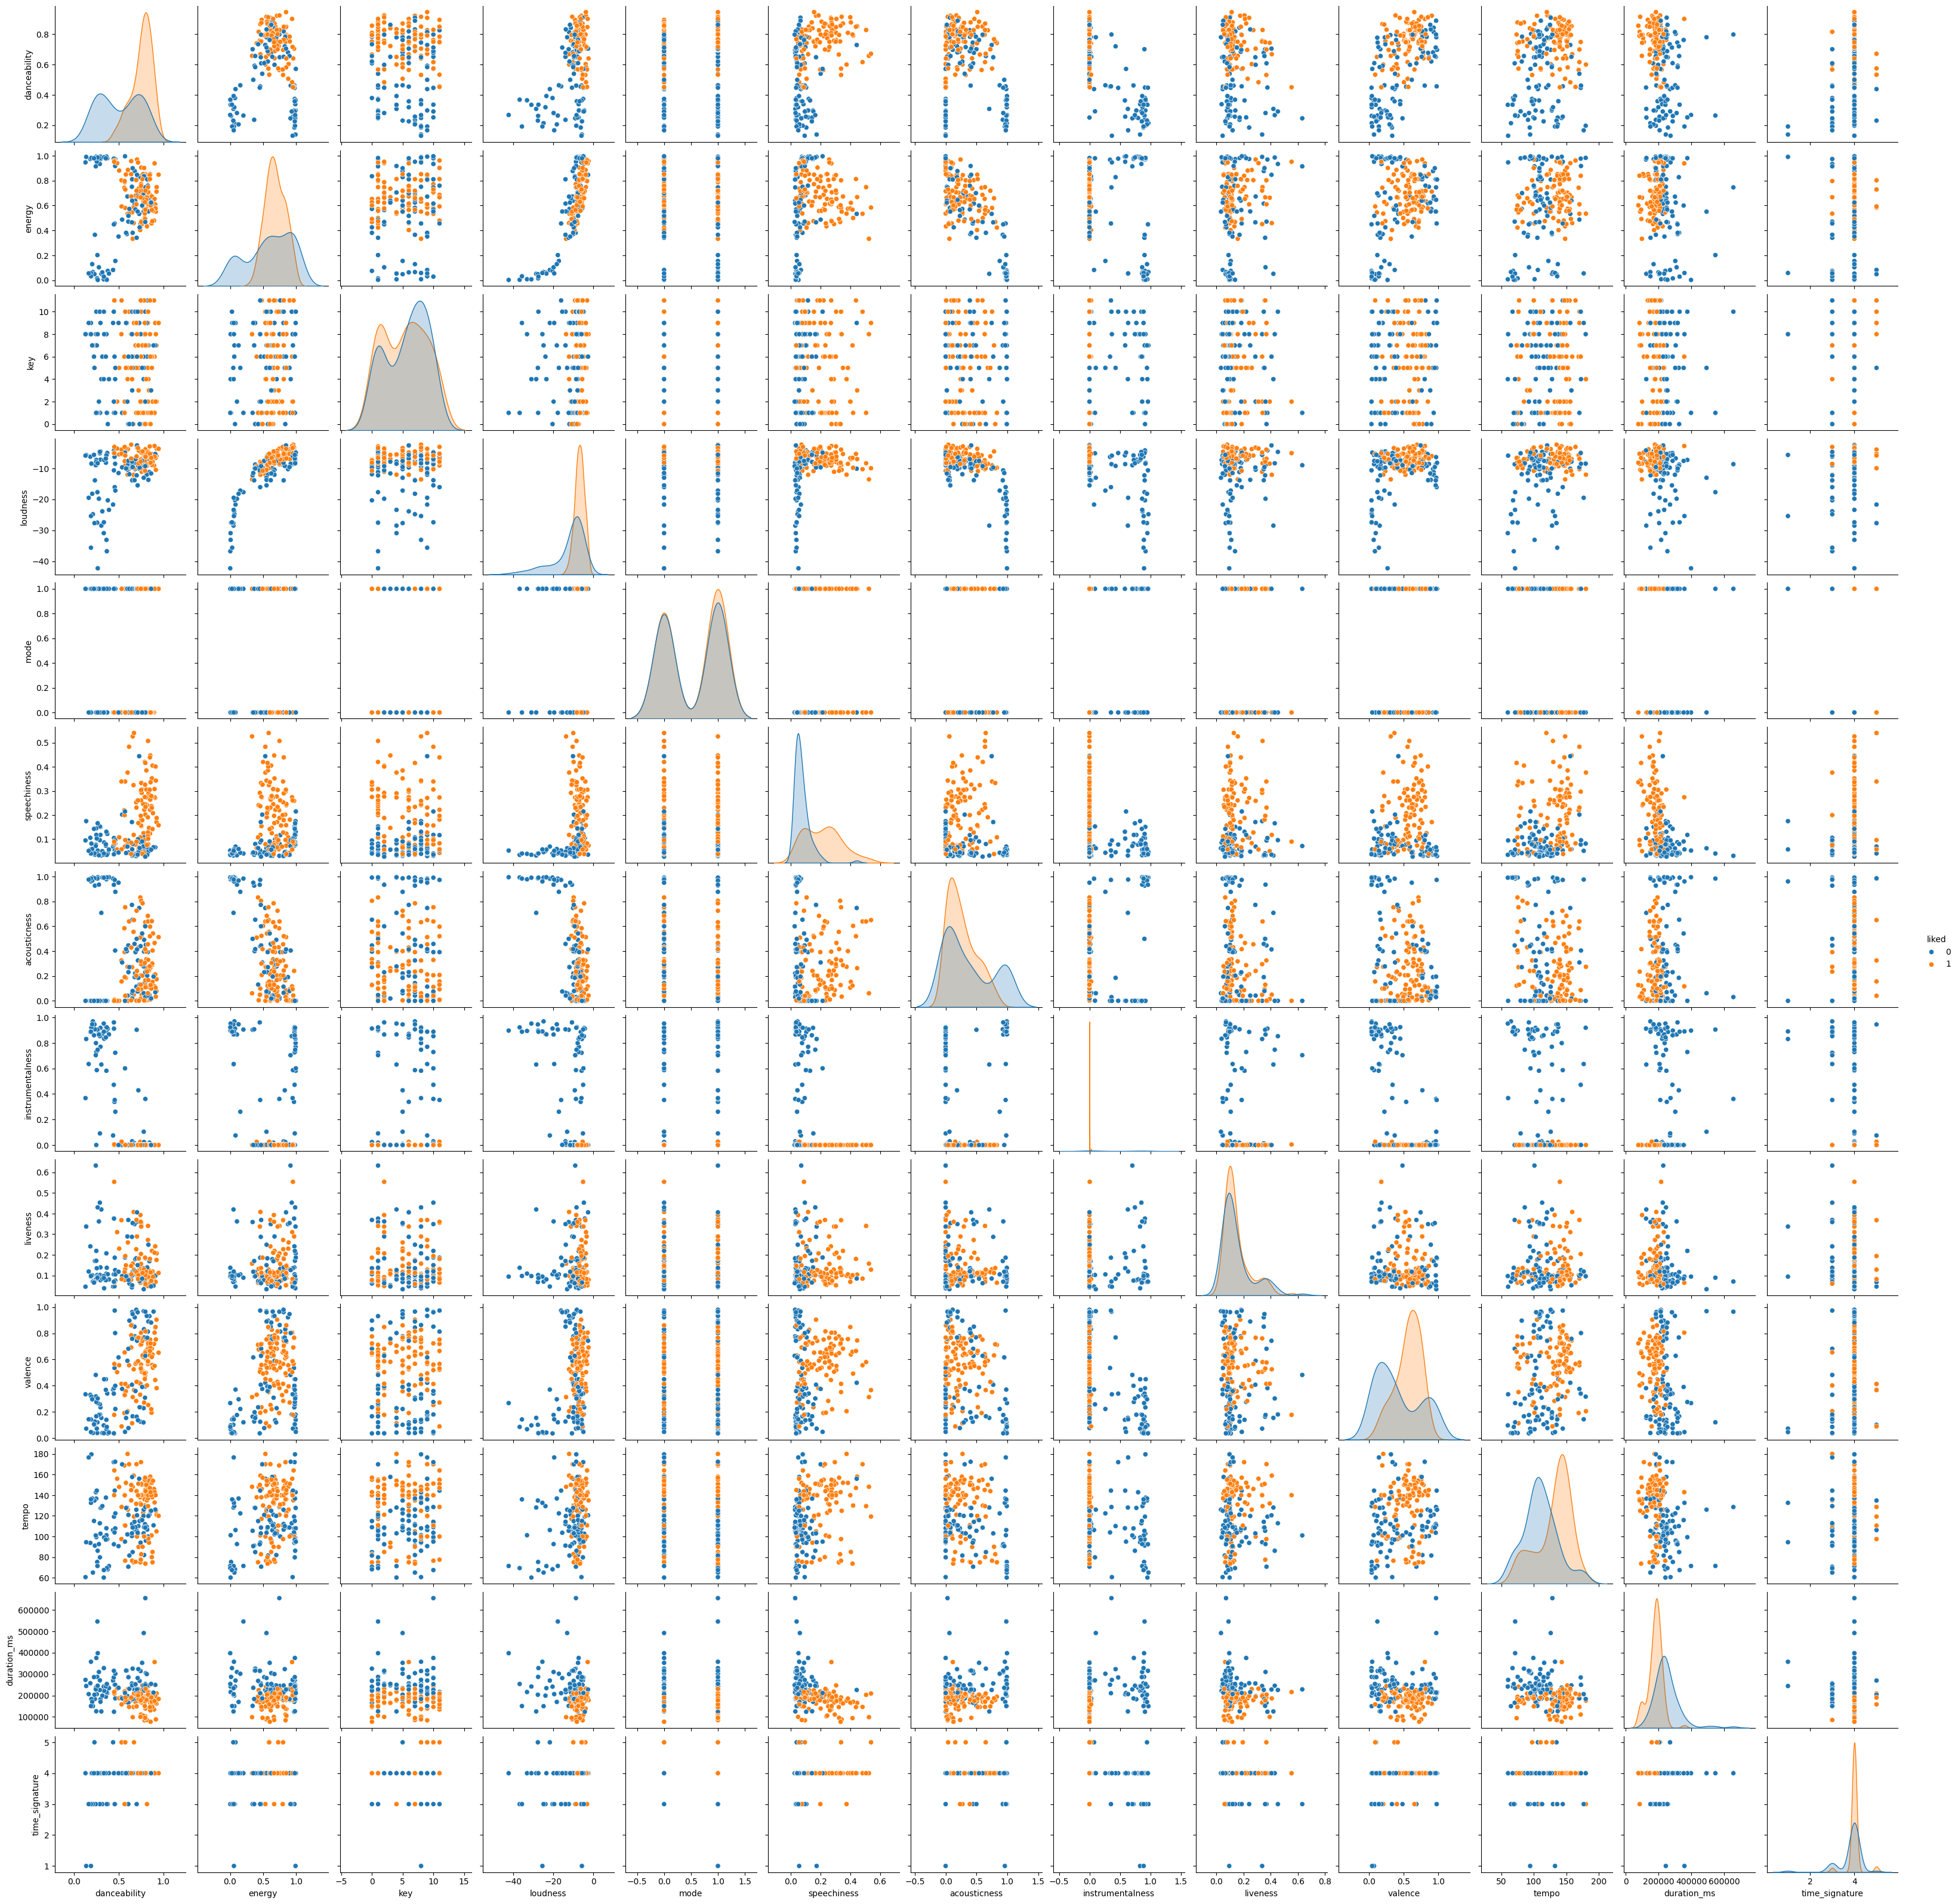

In [ ]:
sns.pairplot(df, hue='liked')

There's a huge number of graphs, which we, of course, not gonna look into closely. taking a brief look at it, we may already notice that distributions of some features coincide for both target values (mode, liveness, key), which means that they probably won't help us in predicting target.

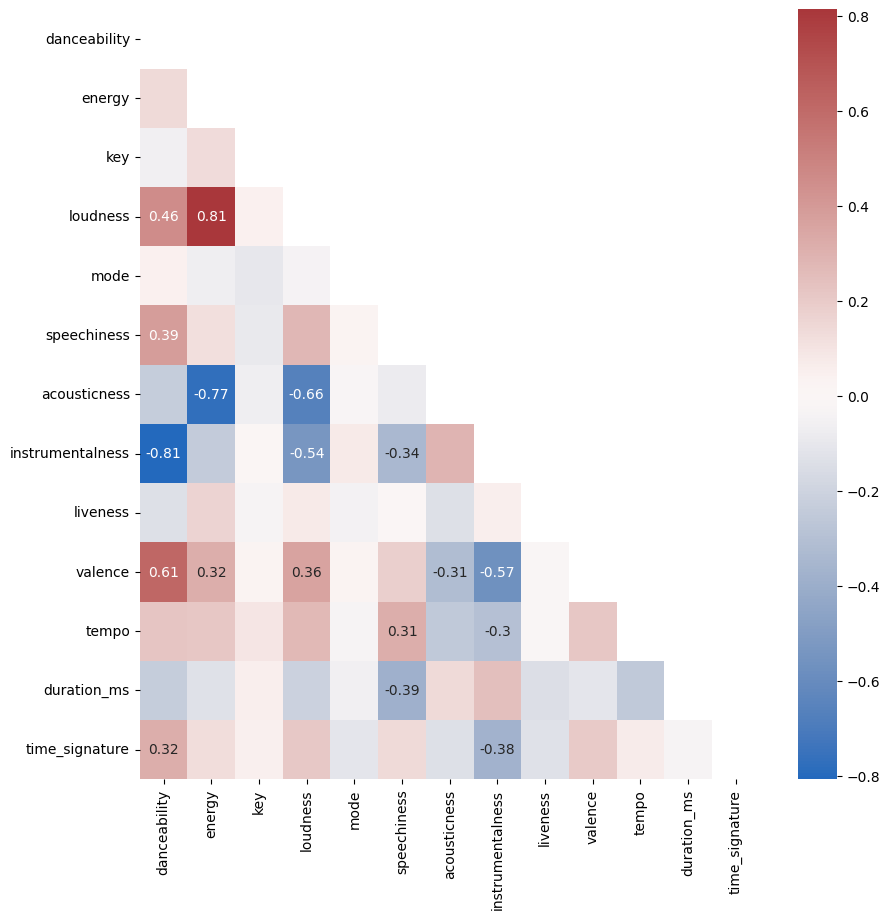

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

feature_corr = df.drop(columns='liked').corr()
mask = np.triu(np.ones_like(feature_corr, dtype=bool))
sns.heatmap(feature_corr, mask=mask, cmap="vlag", annot=True)
for t in ax.texts:
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= -0.3:
        t.set_text(t.get_text())
    else:
        t.set_text('')

plt.show()

We can observe

- a **high positive** correlation between loudness and energy (loud music is likely to be more active, energetic)

______
- a **high negative** correlation between instrumentalness and danceability (makes sense: the less vocal content a song has, the wider, probably its range of sounds)
- a **high negative** correlation between acousticness and energy (acoustic tracks are usually soothing)

____
- a **moderate positive** correlation between valence and danceability (the happier a song sounds, the more it makes you wanna dance)
- a **moderate positive** correlation between loudness and danceability (louder songs are usually more active and therefore are more likely to make you wanna dance)

_____

- a **moderate negative** correlation between acousticness and loudness (acoustic songs tend to be rather quiet)

- a **moderate negative** correlation between instrumentalness and loudness (looks like songd are usually loud because of the singer singing loudly, not because of the loud music)

- a **moderate negative** correlation between valence and instrumentalness (songs that contain less vocal content tend to sound rather upsetting, they usually set a reflective mood)

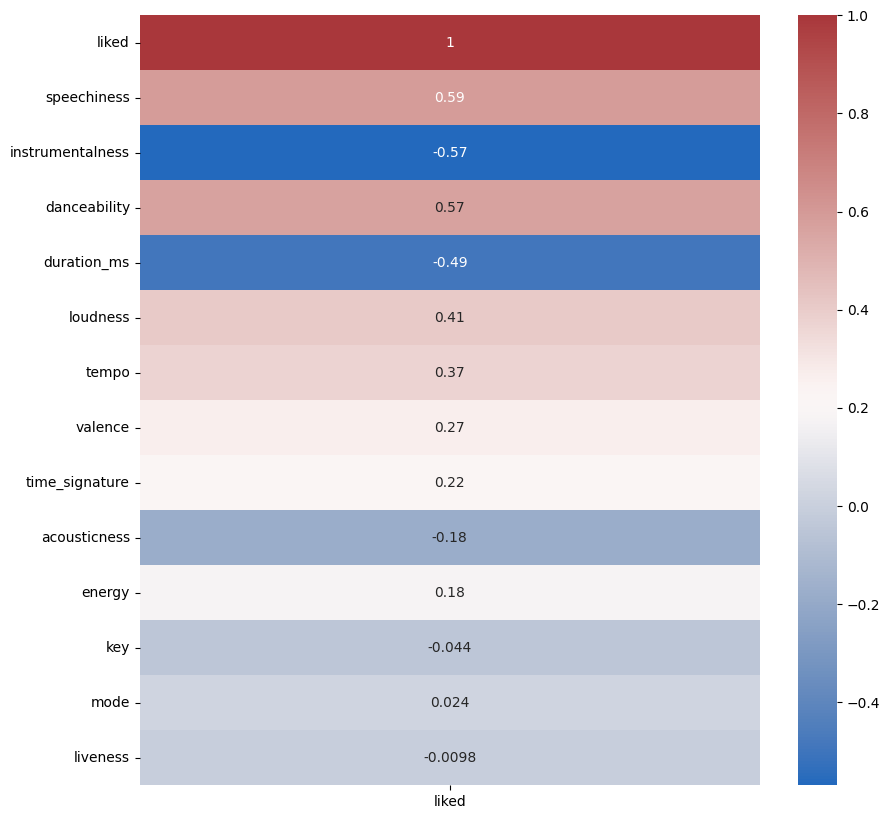

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

target_corr = df.corr()[['liked']].sort_values(by='liked', key=abs, ascending=False)
sns.heatmap(target_corr, cmap='vlag', annot=True)

plt.show()

This correlation graph of target with every feature proves the assumption we made after taking a brief look at a bunch of graphs at the very beginning: liveness, mode and key aren't correlated with target.

Meanwhile target has moderate (0.4 <= r <= 0.59) positive correlation with speechiness, danceability and loudness and moderate negative correlation with instrumentalness, duration_ms.

It means that the user prefers songs
- that contain many much lyrics, both music and speech or are layered,
- that are danceable and loud (interesting that despite this, energy isn't correlated with target)
- that are neither instrumental (have many spoken words or rap) nor long.

# Modelling

## Train/test split + normalization

In [ ]:
X, y = df.drop(columns='liked'), df['liked']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=RANDOM_STATE)
print(f'train shape: {X_train.shape}, test shape: {X_test.shape}')

train shape: (136, 13), test shape: (59, 13)


In [ ]:
X.head(3)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000734    0.1000   0.6280   95.968       304524               4  
1          0.000000    0.0912   0.5190  151.329       247178               4  
2          0.897000    0.1020   0.0382   75.296       286987               4

In [ ]:
# scaling features to normalize the range of variables
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler

normalizer = StandardScaler()
# normalizer = RobustScaler() # worse results, probably because we don't sem to have any anomalies in the dataset

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             log_loss, roc_auc_score, confusion_matrix)

def evaluate(y_true, y_pred):
  return {
      'accuracy': accuracy_score(y_true, y_pred),
      'precision': precision_score(y_true, y_pred),
      'recall': recall_score(y_true, y_pred),
      'roc-auc': roc_auc_score(y_true, y_pred),
      'log loss': log_loss(y_true, y_pred)
      }


def get_cf(y_true, y_pred):
    cf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf_matrix, annot=True)
    plt.show()

In [ ]:
results = {}

Given a song recommendation task, it's better to "overpredict" - to predict songs which may not be relevant, than to under-predict - to minimize the number of recommended songs so that the recommended ones were relevant for sure.  

It's better to flag more objects as relevant, it will add some diversity to the recommended content. Recall > precision.

## KNN

Baseline model:


 {'accuracy': 0.864406779661017, 'precision': 0.90625, 'recall': 0.8529411764705882, 'roc-auc': 0.8664705882352941, 'log loss': 4.887275035812495}


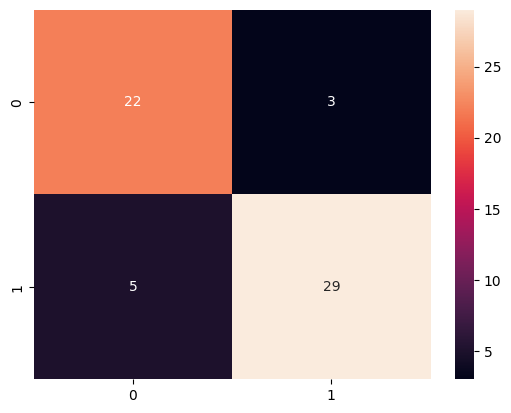

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['knn'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 20)),
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev'],
    'weights': ['uniform', 'distance'],
    }

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False
    )

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'cosine', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9545454545454546
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


639 µs ± 9.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 {'accuracy': 0.864406779661017, 'precision': 0.8823529411764706, 'recall': 0.8823529411764706, 'roc-auc': 0.8611764705882352, 'log loss': 4.887275035812495}


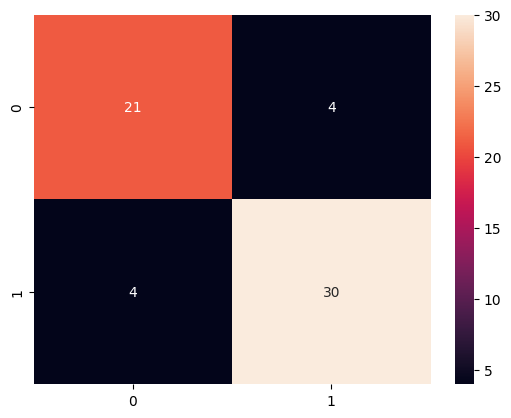

In [ ]:
best_knn = KNeighborsClassifier(**grid.best_params_)
%timeit best_knn.fit(X_train_norm, y_train)
y_pred = best_knn.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['knn grid'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

## Logistic Regression


 {'accuracy': 0.8983050847457628, 'precision': 0.9117647058823529, 'recall': 0.9117647058823529, 'roc-auc': 0.8958823529411764, 'log loss': 3.6654562768593717}


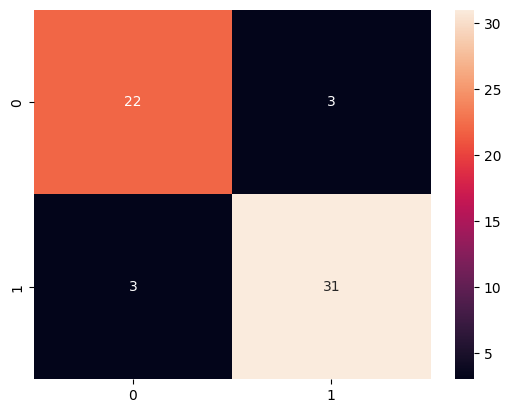

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(X_train_norm, y_train)
y_pred = logreg.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['log reg'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
logreg = LogisticRegression(random_state=RANDOM_STATE)

param_grid = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 50)
}

grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=22),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963623...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9545454545454546
{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


1.27 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 {'accuracy': 0.7796610169491526, 'precision': 0.7692307692307693, 'recall': 0.8823529411764706, 'roc-auc': 0.7611764705882353, 'log loss': 7.941821933195305}


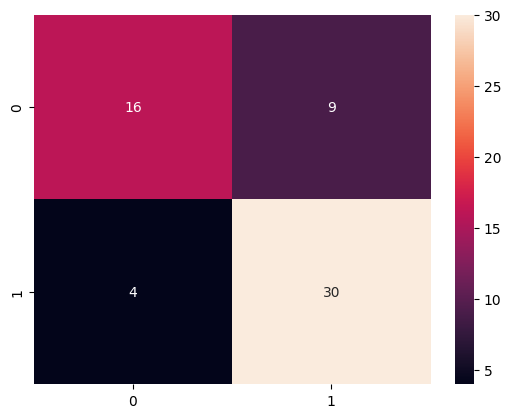

In [ ]:
best_logreg = LogisticRegression(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_logreg.fit(X_train_norm, y_train)
y_pred = best_logreg.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['log reg grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

## Decision Tree Classifier


 {'accuracy': 0.8135593220338984, 'precision': 0.8484848484848485, 'recall': 0.8235294117647058, 'roc-auc': 0.811764705882353, 'log loss': 6.720003174242181}


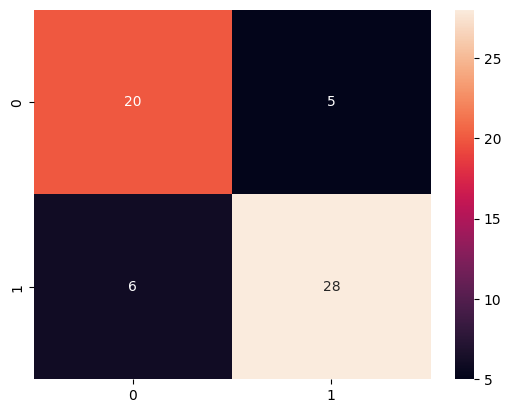

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_norm, y_train)
y_pred = dt.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['decision tree'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4],
    'max_depth' : [1, 3, 6, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8484848484848485
{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


1.2 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 {'accuracy': 0.8135593220338984, 'precision': 0.8484848484848485, 'recall': 0.8235294117647058, 'roc-auc': 0.811764705882353, 'log loss': 6.720003174242181}


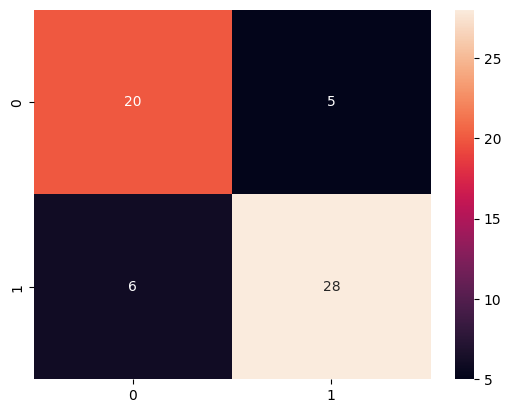

In [ ]:
best_dt = DecisionTreeClassifier(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_dt.fit(X_train_norm, y_train)
y_pred = best_dt.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['decision tree grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

## Random Forest Classifier


 {'accuracy': 0.864406779661017, 'precision': 0.8421052631578947, 'recall': 0.9411764705882353, 'roc-auc': 0.8505882352941176, 'log loss': 4.887275035812495}


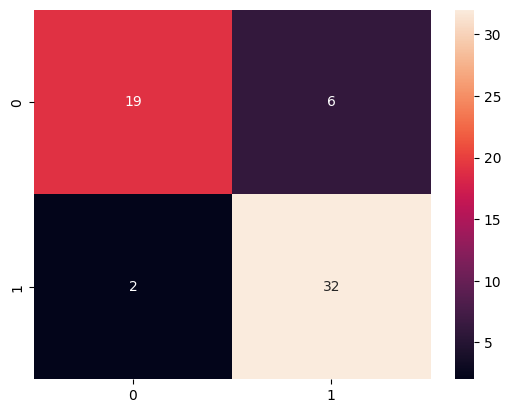

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train_norm, y_train)
y_pred = rf.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['random forest'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
importances = rf.feature_importances_
feature_ids = np.argsort(importances)[::-1]
print('importance of every feature:\n')
for feature_id, importance in zip(feature_ids, importances):
  print(f'{X.columns.to_list()[feature_id]} - {importances[feature_id]}')

importance of every feature:

instrumentalness - 0.22533796729215502
duration_ms - 0.16238181879563757
speechiness - 0.14317672392180325
tempo - 0.12497575859776332
danceability - 0.11240759582811777
loudness - 0.06001398075930327
valence - 0.056337409257449574
energy - 0.04042357850891721
acousticness - 0.02409472374724555
key - 0.019157001643059234
liveness - 0.018913624249537714
time_signature - 0.010341011458415074
mode - 0.0024388059405955347


In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the foreset
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 6, 10],  # max number of levels in each decision tree
    'min_samples_split': [2, 4, 6], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2, 4], # min number of data points allowed in a leaf node
    'max_features': ['sqrt', 'log2'],  # max number of features considered for splitting a node
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='recall', return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=22),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9242424242424243
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


299 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 {'accuracy': 0.864406779661017, 'precision': 0.8421052631578947, 'recall': 0.9411764705882353, 'roc-auc': 0.8505882352941176, 'log loss': 4.887275035812495}


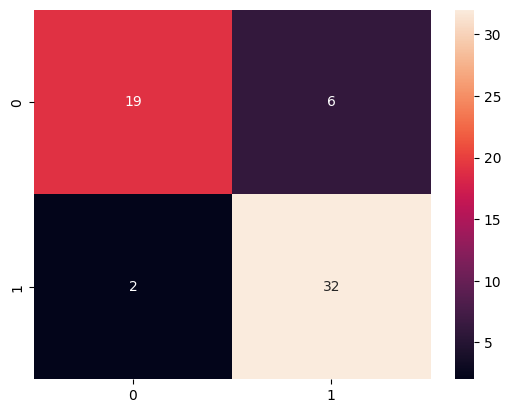

In [ ]:
best_rf = RandomForestClassifier(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_rf.fit(X_train_norm, y_train)
y_pred = best_rf.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['random forest grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

In [ ]:
importances = best_rf.feature_importances_
feature_ids = np.argsort(importances)[::-1]
print('importance of every feature:\n')
for feature_id, importance in zip(feature_ids, importances):
  print(f'{X.columns.to_list()[feature_id]} - {importances[feature_id]}')

importance of every feature:

instrumentalness - 0.25840774232690233
duration_ms - 0.16583857010343273
speechiness - 0.13793097809734886
danceability - 0.10990327101827285
tempo - 0.10741670095457764
loudness - 0.0646446241893529
valence - 0.05684777986977553
energy - 0.038094476913167655
acousticness - 0.024165572094855946
liveness - 0.01515798192402525
key - 0.012945077135891655
time_signature - 0.006907156544034797
mode - 0.001740068828361865


## XGBoost


 {'accuracy': 0.8813559322033898, 'precision': 0.8461538461538461, 'recall': 0.9705882352941176, 'roc-auc': 0.8652941176470589, 'log loss': 4.276365656335933}


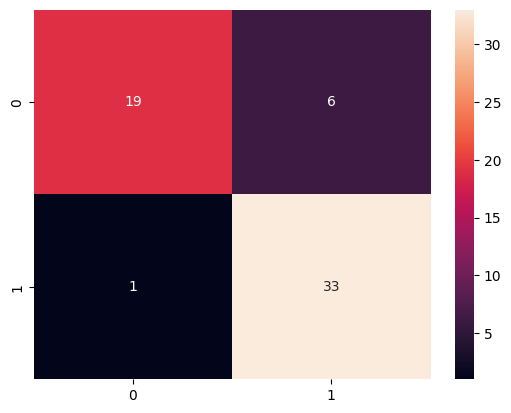

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb.fit(X_train_norm, y_train)
y_pred = xgb.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['xgboost'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
xgb = XGBClassifier(random_state=RANDOM_STATE)

param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.04, 0.05],
    'n_estimators': [50, 100, 150, 200],
    'min_child_weight': [2, 3, 4],  # min sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2]  # min loss reduction required to make a further partition on a leaf node of the tree
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=22, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.04, 0.05],
                         'max_depth': [5, 6, 7], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9393939393939394
{'gamma': 0, 'learning_rate': 0.04, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150}


41 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

 {'accuracy': 0.864406779661017, 'precision': 0.8421052631578947, 'recall': 0.9411764705882353, 'roc-auc': 0.8505882352941176, 'log loss': 4.887275035812495}


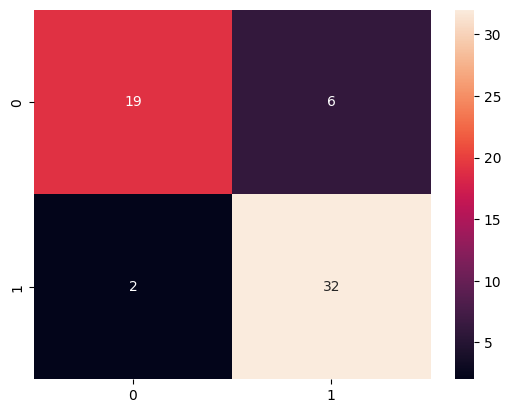

In [ ]:
best_xgb = XGBClassifier(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_xgb.fit(X_train_norm, y_train)
y_pred = best_xgb.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
results['xgboost grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

# Results for models trained on all features

Let's check results for every best model. Cells with the highest recall value is highlighted with a green color.

In [ ]:
res_df = pd.DataFrame(results).transpose()
res_df.style.highlight_max(subset=['recall', 'accuracy'], color='lightgreen', axis=0).highlight_min(subset=['recall', 'accuracy'], color='red', axis=0)

# Excluding unimportant features

Let's consider feature improtances, computated by the random forest model and remove the 3 least important features (with the coefficient < 0.019)

In [ ]:
features_to_exclude = ['time_signature', 'mode', 'key']

In [ ]:
X, y = df.drop(columns=features_to_exclude + ['liked']), df['liked']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=RANDOM_STATE)
print(f'train shape: {X_train.shape}, test shape: {X_test.shape}')

normalizer = StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

train shape: (136, 10), test shape: (59, 10)


In [ ]:
new_results = {}

## KNN

Baseline model:


 {'accuracy': 0.8813559322033898, 'precision': 0.9090909090909091, 'recall': 0.8823529411764706, 'roc-auc': 0.8811764705882353, 'log loss': 4.276365656335933}


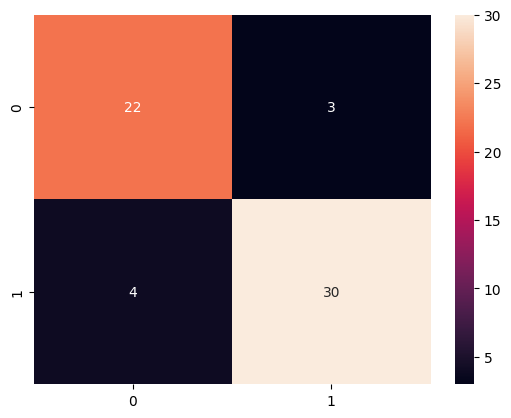

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['knn'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 20)),
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev'],
    'weights': ['uniform', 'distance'],
    }

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False
    )

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'cosine', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9696969696969697
{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


1.36 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 {'accuracy': 0.9152542372881356, 'precision': 0.8918918918918919, 'recall': 0.9705882352941176, 'roc-auc': 0.9052941176470588, 'log loss': 3.0545468973828096}


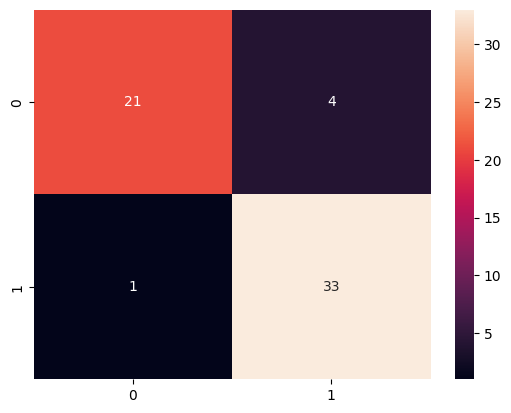

In [ ]:
best_knn = KNeighborsClassifier(**grid.best_params_)
%timeit best_knn.fit(X_train_norm, y_train)
y_pred = best_knn.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['knn grid'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

## Logistic Regression


 {'accuracy': 0.8813559322033898, 'precision': 0.9090909090909091, 'recall': 0.8823529411764706, 'roc-auc': 0.8811764705882353, 'log loss': 4.276365656335933}


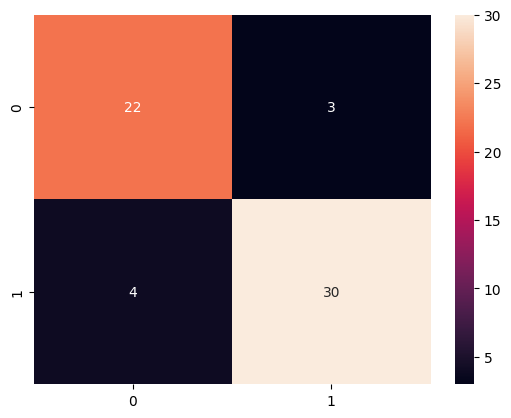

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(X_train_norm, y_train)
y_pred = logreg.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['log reg'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
logreg = LogisticRegression(random_state=RANDOM_STATE)

param_grid = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 50)
}

grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=22),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963623...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9696969696969697
{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


1.27 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 {'accuracy': 0.7796610169491526, 'precision': 0.7692307692307693, 'recall': 0.8823529411764706, 'roc-auc': 0.7611764705882353, 'log loss': 7.941821933195305}


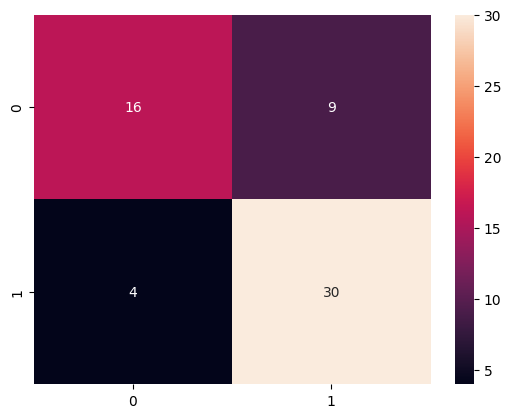

In [ ]:
best_logreg = LogisticRegression(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_logreg.fit(X_train_norm, y_train)
y_pred = best_logreg.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['log reg grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

## Decision Tree Classifier


 {'accuracy': 0.847457627118644, 'precision': 0.8787878787878788, 'recall': 0.8529411764705882, 'roc-auc': 0.8464705882352941, 'log loss': 5.498184415289057}


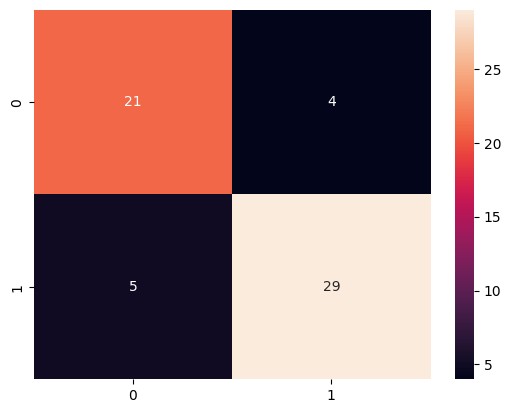

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_norm, y_train)
y_pred = dt.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['decision tree'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4],
    'max_depth' : [1, 3, 6, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9696969696969697
{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


1.02 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

 {'accuracy': 0.7796610169491526, 'precision': 0.7333333333333333, 'recall': 0.9705882352941176, 'roc-auc': 0.7452941176470589, 'log loss': 7.941821933195304}


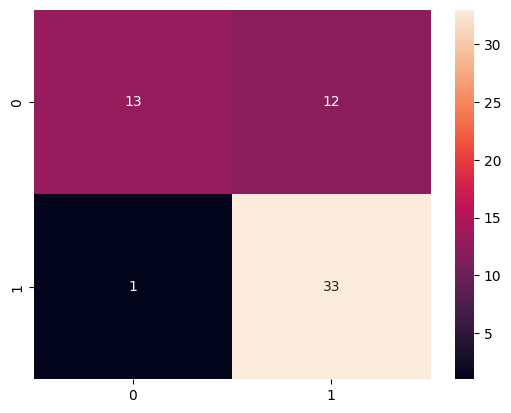

In [ ]:
best_dt = DecisionTreeClassifier(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_dt.fit(X_train_norm, y_train)
y_pred = best_dt.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['decision tree grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

## Random Forest Classifier


 {'accuracy': 0.864406779661017, 'precision': 0.8421052631578947, 'recall': 0.9411764705882353, 'roc-auc': 0.8505882352941176, 'log loss': 4.887275035812495}


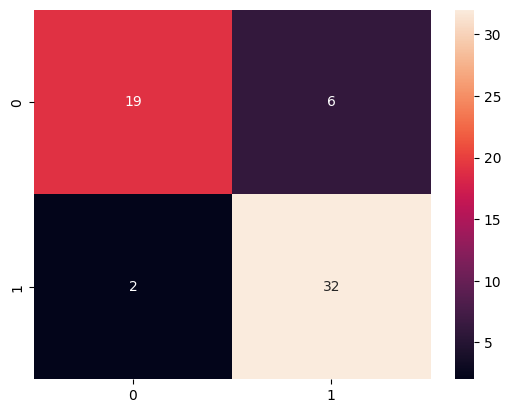

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train_norm, y_train)
y_pred = rf.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['random forest'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
importances = rf.feature_importances_
feature_ids = np.argsort(importances)[::-1]
print('importance of every feature:\n')
for feature_id, importance in zip(feature_ids, importances):
  print(f'{X.columns.to_list()[feature_id]} - {importances[feature_id]}')

importance of every feature:

instrumentalness - 0.2527220080951849
duration_ms - 0.17232495100887812
speechiness - 0.14157805850369695
danceability - 0.1134679616750209
tempo - 0.10468139998568908
valence - 0.06439062716591498
loudness - 0.053590129147228695
acousticness - 0.04097462312753104
energy - 0.030260998131125618
liveness - 0.02600924315972977


In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the foreset
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 6, 10],  # max number of levels in each decision tree
    'min_samples_split': [2, 4, 6], # min number of data points placed in a node before the node is split
    'min_samples_leaf': [2, 4], # min number of data points allowed in a leaf node
    'max_features': ['sqrt', 'log2'],  # max number of features considered for splitting a node
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=22),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 6, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9242424242424243
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


310 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 {'accuracy': 0.8813559322033898, 'precision': 0.8648648648648649, 'recall': 0.9411764705882353, 'roc-auc': 0.8705882352941177, 'log loss': 4.276365656335933}


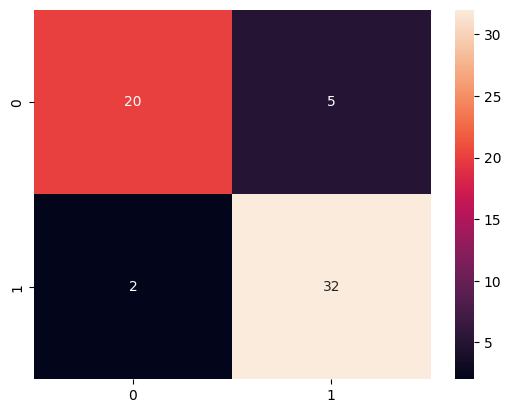

In [ ]:
best_rf = RandomForestClassifier(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_rf.fit(X_train_norm, y_train)
y_pred = best_rf.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['random forest grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

In [ ]:
importances = best_rf.feature_importances_
feature_ids = np.argsort(importances)[::-1]
print('importance of every feature:\n')
for feature_id, importance in zip(feature_ids, importances):
  print(f'{X.columns.to_list()[feature_id]} - {importances[feature_id]}')

importance of every feature:

instrumentalness - 0.23732908723778198
duration_ms - 0.16651688667768988
speechiness - 0.14743021280770113
tempo - 0.1262891891227337
danceability - 0.12283237881883687
loudness - 0.058519064540150156
valence - 0.0515905325206764
energy - 0.03292156780598667
acousticness - 0.032886223789481604
liveness - 0.023684856678961707


## XGBoost


 {'accuracy': 0.8813559322033898, 'precision': 0.8461538461538461, 'recall': 0.9705882352941176, 'roc-auc': 0.8652941176470589, 'log loss': 4.276365656335933}


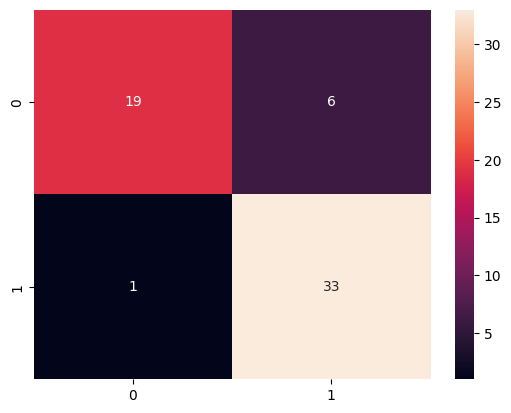

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb.fit(X_train_norm, y_train)
y_pred = xgb.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['xgboost'] = eval_res
print('\n', eval_res)
get_cf(y_test, y_pred)

In [ ]:
xgb = XGBClassifier(random_state=RANDOM_STATE)

param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.01, 0.04, 0.05],
    'n_estimators': [50, 100, 150, 200],
    'min_child_weight': [2, 3, 4],  # min sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2]  # min loss reduction required to make a further partition on a leaf node of the tree
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    return_train_score=False)

grid.fit(X_train_norm, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=22, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.04, 0.05],
                         'max_depth': [5, 6, 7], 'min_child_weight': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9393939393939394
{'gamma': 0, 'learning_rate': 0.04, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150}


42.4 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

 {'accuracy': 0.864406779661017, 'precision': 0.8421052631578947, 'recall': 0.9411764705882353, 'roc-auc': 0.8505882352941176, 'log loss': 4.887275035812495}


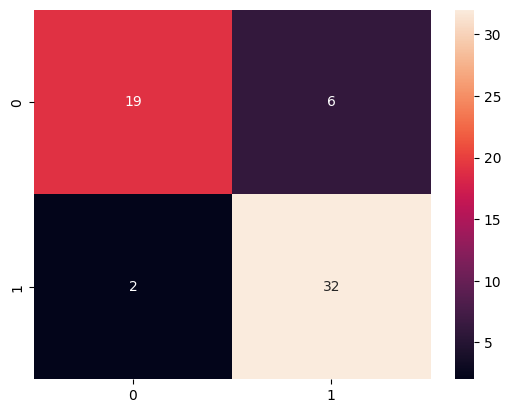

In [ ]:
best_xgb = XGBClassifier(random_state=RANDOM_STATE, **grid.best_params_)
%timeit best_xgb.fit(X_train_norm, y_train)
y_pred = best_xgb.predict(X_test_norm)

eval_res = evaluate(y_test, y_pred)
new_results['xgboost grid'] = eval_res
print('\n', eval_res)

get_cf(y_test, y_pred)

# Results for models trained on important features

In [ ]:
new_res_df = pd.DataFrame(new_results).transpose()
new_res_df.style.highlight_max(subset=['recall', 'accuracy'], color='lightgreen', axis=0).highlight_min(subset=['recall', 'accuracy'], color='red', axis=0)

The quality of most models increased compared to when they were trained on all features, but KNN is definitely a winner here!

# Conclusion

- It's necessary to pay attention to and save the results of a baseline model, 'cause GridSearchCV doesn't always help to improve a model's quality due to additional cross validation data splitting and, as a result, reduced dataset size.

- Feature selection, which can be done examining correlation between all features and target or using random forest model (which computes feature importances during training), may help increase the quality.

- With tuning and feature engineering even simple lightweight non-parametric models may show best results - KNN was able to outperform all other models in terms of accuracy and recall metrics.


```
best_knn_grid_params = {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(**best_knn_grid_params)
```



- Tuned decision tree showed the worst results in both cases - before and after we excluded some features.